# Visualization of Dataset Properties

In [1]:
"""
    IMPORTING LIBS
"""
import numpy as np
import socket
import time

from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("..") 
from data.data import LoadData # import dataset

Using backend: pytorch


## 1. TU Datasets Visualization Script

In [3]:
def visualize_TUs_data(DATASET_NAME):
    print("[I] Loading data (notebook) ...")
    dataset = LoadData(DATASET_NAME)
    trainset, valset, testset = dataset.train, dataset.val, dataset.test
    print("[I] Finished loading.")

    # Original Statistics
    num_nodes, graph_labels = [], []
    for split in [dataset.train, dataset.test, dataset.val]:
        num_nodes += [g.number_of_nodes() for g in split[0][:][0]]
        graph_labels += split[0][:][1]
    orig_mean, orig_std, orig_max, orig_min = np.mean(num_nodes), np.std(num_nodes), np.max(num_nodes), np.min(num_nodes)

    max_nodes = int(orig_mean+orig_std)
    print("Original Dataset Statistics:\n")
    print("Max nodes {}, Min nodes {}\n".format(orig_max, orig_min))
    print("Mean no. of nodes {}, S.d. {}\n".format(orig_mean, orig_std))

    num_nodes, graph_labels = [], []
    for split in [dataset.train, dataset.test, dataset.val]:
        split_num_nodes, split_graph_labels = [], []
        g = split[0][:][0]
        lab = split[0][:][1]
        for idx in range(len(g)):
            if g[idx].number_of_nodes() < max_nodes:
                split_num_nodes.append(g[idx].number_of_nodes())
                split_graph_labels.append(lab[idx])


        num_nodes += split_num_nodes
        graph_labels += split_graph_labels
    label_bins = len(np.unique(graph_labels))
    
    print("VISUALIZATIONS:\nMax nodes in consideration: {}".format(max_nodes))
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    
    plt.hist(num_nodes, bins=len(np.unique(num_nodes)))
    plt.xlabel('Number of Nodes in Graph', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    plt.subplot(122)
    plt.hist2d(graph_labels, num_nodes, bins=[label_bins, 20])
    plt.xlabel(r'Graph label', fontsize=12)
    plt.ylabel(r'Graph size (number of nodes)', fontsize=12)
    plt.colorbar()
    plt.show()
    
    print("Correlation between graph size (number of nodes) and labels: %.2f" % np.corrcoef(graph_labels, num_nodes)[0,1])

### a. TU Dataset ENZYMES

[I] Loading data (notebook) ...
[!] Dataset:  ENZYMES
Time taken: 0.2974s
[I] Finished loading.
Original Dataset Statistics:

Max nodes 126, Min nodes 2

Mean no. of nodes 32.63333333333333, S.d. 15.275761483110715

VISUALIZATIONS:
Max nodes in consideration: 47


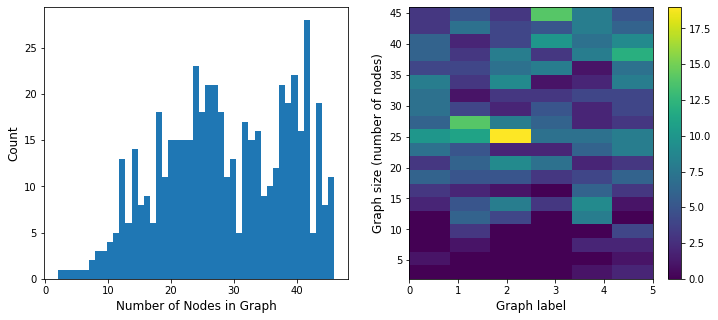

Correlation between graph size (number of nodes) and labels: 0.04


In [4]:
visualize_TUs_data('ENZYMES')

### b. TU Datasets DD

[I] Loading data (notebook) ...
[!] Dataset:  DD
Time taken: 0.4548s
[I] Finished loading.
Original Dataset Statistics:

Max nodes 5748, Min nodes 30

Mean no. of nodes 284.3166383701188, S.d. 271.99968930043167

VISUALIZATIONS:
Max nodes in consideration: 556


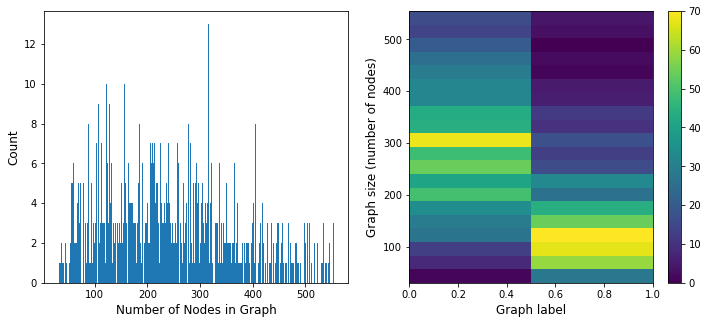

Correlation between graph size (number of nodes) and labels: -0.51


In [15]:
visualize_TUs_data('DD')

### c. TU Datasets PROTEINS_full

[I] Loading data (notebook) ...
[!] Dataset:  PROTEINS_full
Time taken: 0.3725s
[I] Finished loading.
Original Dataset Statistics:

Max nodes 620, Min nodes 4

Mean no. of nodes 39.05750224618149, S.d. 45.758421863948776

VISUALIZATIONS:
Max nodes in consideration: 84


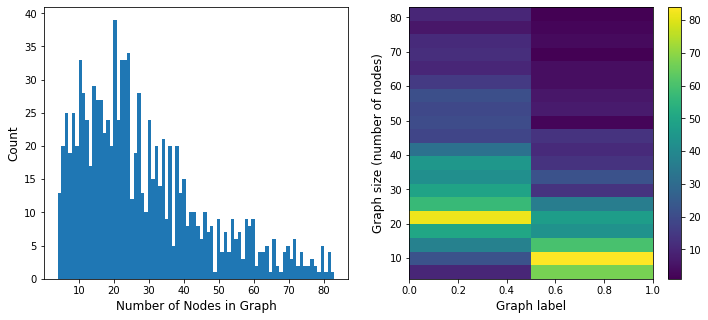

Correlation between graph size (number of nodes) and labels: -0.36


In [25]:
visualize_TUs_data('PROTEINS_full')

[I] Loading data (notebook) ...
[!] Dataset:  NCI1
Time taken: 1.3006s
[I] Finished loading.
Original Dataset Statistics:

Max nodes 111, Min nodes 3

Mean no. of nodes 29.8654501216545, S.d. 13.563571093451857

VISUALIZATIONS:
Max nodes in consideration: 43


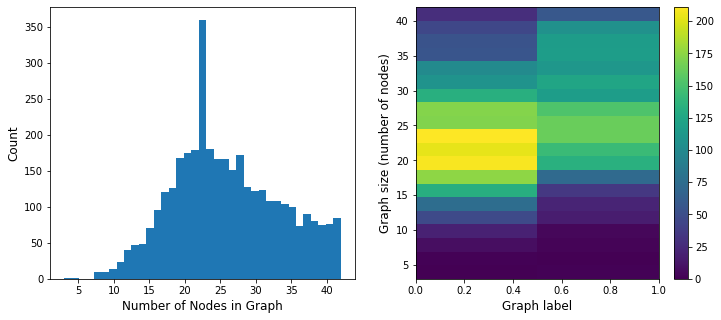

Correlation between graph size (number of nodes) and labels: 0.25


In [6]:
visualize_TUs_data('NCI1')